In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
from sklearn import preprocessing

In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [7]:
Y = df[['quality']]

In [8]:
import numpy as np

In [9]:
X.isna().any()

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                       True
sulphates                True
alcohol                 False
dtype: bool

In [10]:
X = X.fillna(0)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import preprocessing

In [13]:
x = preprocessing.StandardScaler().fit(X).transform(X)

In [14]:
train_x,test_x,train_y,test_y = train_test_split(x,Y,test_size = 0.25)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(train_x,train_y)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
pred = lr.predict(test_x)

In [19]:
prob = lr.predict_proba(test_x)

In [20]:
from sklearn.metrics import log_loss,accuracy_score,classification_report,jaccard_similarity_score

In [21]:
print(accuracy_score(test_y,pred))

0.5316923076923077


In [22]:
print(jaccard_similarity_score(test_y,pred))

0.5316923076923077


In [23]:
print(classification_report(test_y,pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.00      0.00      0.00        43
          5       0.59      0.60      0.59       530
          6       0.50      0.74      0.60       705
          7       0.50      0.09      0.15       285
          8       0.00      0.00      0.00        51
          9       0.00      0.00      0.00         2

avg / total       0.50      0.53      0.48      1625



/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(test_y,pred)

In [26]:
cm

array([[  0,   0,   5,   4,   0,   0,   0],
       [  0,   0,  26,  17,   0,   0,   0],
       [  0,   0, 316, 214,   0,   0,   0],
       [  0,   0, 163, 523,  19,   0,   0],
       [  0,   0,  23, 237,  25,   0,   0],
       [  0,   0,   2,  44,   5,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0]])

In [27]:
import seaborn as sn

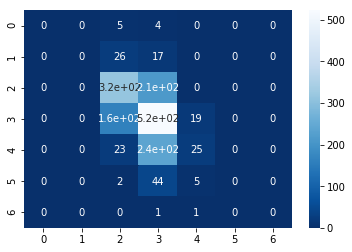

In [28]:
sn.heatmap(cm,annot = True,cmap = 'Blues_r')

In [29]:
x.shape

(6497, 11)